In [15]:
# Basics
import pandas as pd
import psycopg2 as pg
import numpy as np
import pickle

# Visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from model_evaluation import *

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model support
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score, auc,
                             plot_confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, 
                             precision_recall_curve)

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings

warnings.filterwarnings('ignore')

In [16]:
!pip install catboost
!pip install pycaret[full]
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
url = "https://raw.githubusercontent.com/chenchencherry/CS5344_twitter_bots_eda/main/data.csv"
df = pd.read_csv(url, lineterminator='\n')

# feature selection
features = ['created_at', 'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count', 
            'geo_enabled', 'statuses_count', 'verified', 'average_tweets_per_day', 'popularity', 'favourites_rate', 
            'follower_rate', 'friend_rate']

In [18]:
# 80%train 20%test
X = df[features]
y = df['bot_or_not']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1234)

## Step 1: Prediction Model Implementation
 

*   KNN
*   LogisticRegression
*   SVM
*   NaiveBayes (Gaussian, Bernoulli, Multinomial)
*   Decision Tree
*   RandomForest
*   XGBoost
*   LightGBM
*   CatBoost

In [19]:
# Models need scaling
knn = KNeighborsClassifier(n_neighbors=10)
lr = LogisticRegression()
svm = SVC(probability = True, random_state = 0, max_iter = 500)

# Scaling
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)

model_list = [knn, lr, svm]
kf = KFold(n_splits=5, shuffle=True, random_state=33)

multi_model_eval(model_list, X_train_scaled, y_train, kf)

Model: KNeighborsClassifier(n_neighbors=10)
------------------------------
Accuracy:  0.81896 +- 0.001334
Precision: 0.76949 +- 0.012531
Recall:    0.65161 +- 0.005524
F1 Score:  0.70557 +- 0.003670
ROC AUC:   0.88011 +- 0.002660

Model: LogisticRegression()
------------------------------
Accuracy:  0.80895 +- 0.005893
Precision: 0.71581 +- 0.017683
Recall:    0.70659 +- 0.011506
F1 Score:  0.71109 +- 0.012804
ROC AUC:   0.85918 +- 0.004740

Model: SVC(max_iter=500, probability=True, random_state=0)
------------------------------
Accuracy:  0.55796 +- 0.051340
Precision: 0.29981 +- 0.151976
Recall:    0.43951 +- 0.309825
F1 Score:  0.34808 +- 0.216076
ROC AUC:   0.47590 +- 0.109812



In [20]:
# Models that don't require scaling
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
xgb = XGBClassifier()
lbgm = LGBMClassifier()
cb = CatBoostClassifier()

model_list = [gnb, bnb, mnb, tree, forest, xgb, lbgm, cb]
kf = KFold(n_splits=3, shuffle=True, random_state=33)

multi_model_eval(model_list, X_train, y_train, kf)

Model: GaussianNB()
------------------------------
Accuracy:  0.68034 +- 0.060152
Precision: 0.49281 +- 0.081948
Recall:    0.60955 +- 0.394558
F1 Score:  0.47262 +- 0.268609
ROC AUC:   0.81832 +- 0.003040

Model: BernoulliNB()
------------------------------
Accuracy:  0.74634 +- 0.006607
Precision: 0.70058 +- 0.009759
Recall:    0.41640 +- 0.016342
F1 Score:  0.52214 +- 0.013392
ROC AUC:   0.80337 +- 0.003136

Model: MultinomialNB()
------------------------------
Accuracy:  0.46805 +- 0.005354
Precision: 0.38337 +- 0.005040
Recall:    0.98194 +- 0.003139
F1 Score:  0.55143 +- 0.005386
ROC AUC:   0.59634 +- 0.002138

Model: DecisionTreeClassifier()
------------------------------
Accuracy:  0.82107 +- 0.000572
Precision: 0.72925 +- 0.007446
Recall:    0.73605 +- 0.006460
F1 Score:  0.73257 +- 0.001121
ROC AUC:   0.79981 +- 0.001340

Model: RandomForestClassifier()
------------------------------
Accuracy:  0.87639 +- 0.000694
Precision: 0.85884 +- 0.007191
Recall:    0.75259 +- 0.006608


## Step 2: Confusion Matrix on models without tunning
#### KNN, RandomForest, XGBoost, LightBGM, CatBoost seem most promising in terms of balance between Precision and Recall metrics and high ROC AUC scores. Next I'll look into the confusion matrix for each model under KFolds cross-validation.

### KNN

In [21]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.4.0 requires matplotlib<3.6,>=3.2, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.58 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


Classification Metrics Report
-----------------------------
Accuracy:  0.8190
Precision: 0.7656
Recall:    0.6448
F1 Score:  0.7000

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5036
           1       0.77      0.64      0.70      2452

    accuracy                           0.82      7488
   macro avg       0.80      0.77      0.79      7488
weighted avg       0.82      0.82      0.81      7488




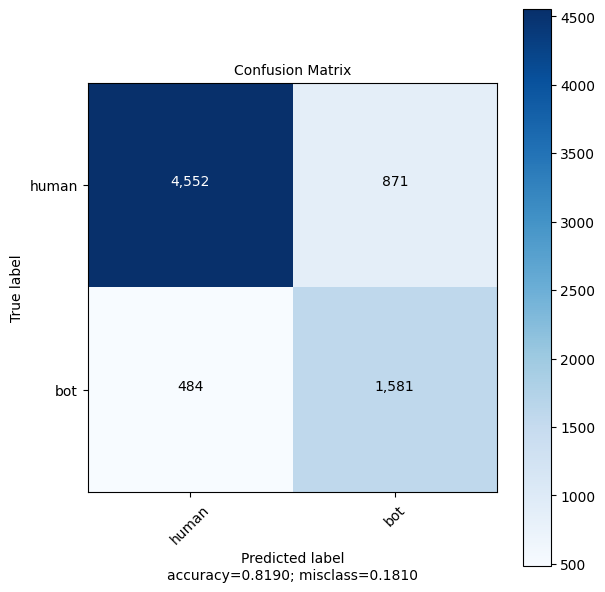

In [22]:
# scale data
scale_train = StandardScaler()
scale_train.fit(X_train)
scaled_X = scale_train.transform(X_train)
scale_test = StandardScaler()
scale_test.fit(X_val)
scaled_test_x = scale_test.transform(X_val)

knn.fit(scaled_X, y_train)
preds = knn.predict(scaled_test_x)
metrics_report(preds, y_val)

### RandomForest

Classification Metrics Report
-----------------------------
Accuracy:  0.8747
Precision: 0.8564
Recall:    0.7418
F1 Score:  0.7950

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5036
           1       0.86      0.74      0.80      2452

    accuracy                           0.87      7488
   macro avg       0.87      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488




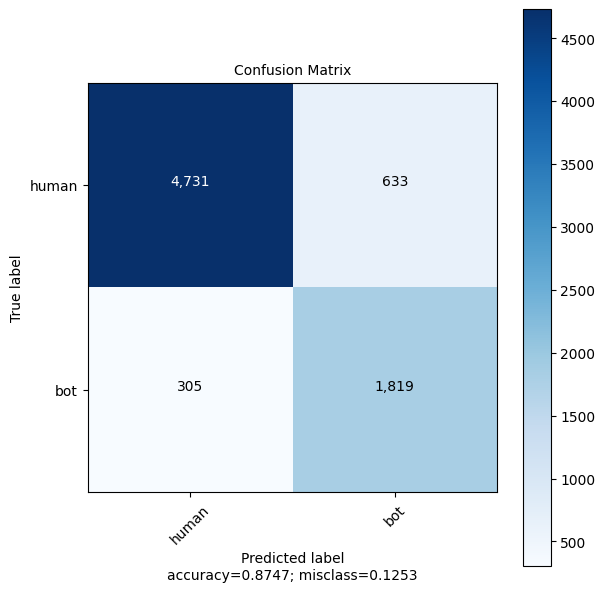

In [ ]:
forest.fit(X_train, y_train)
preds = forest.predict(X_val)
metrics_report(preds, y_val)

### XGBoost

Classification Metrics Report
-----------------------------
Accuracy:  0.8715
Precision: 0.8383
Recall:    0.7529
F1 Score:  0.7933

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5036
           1       0.84      0.75      0.79      2452

    accuracy                           0.87      7488
   macro avg       0.86      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488




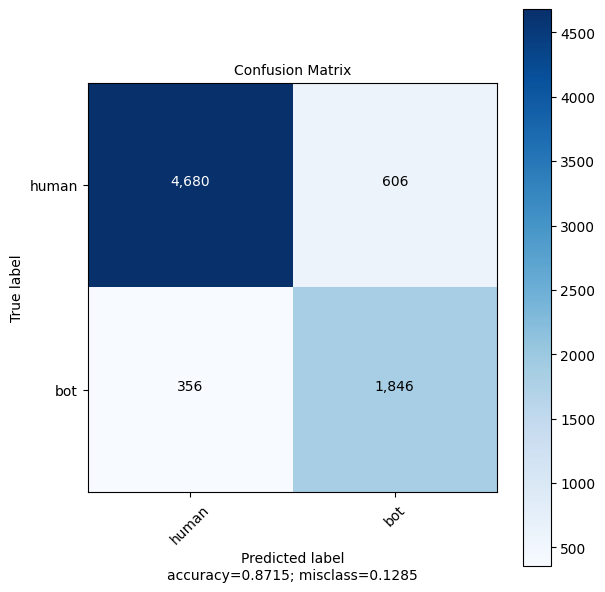

In [ ]:
xgb.fit(X_train, y_train)
preds = xgb.predict(X_val)
metrics_report(preds, y_val)

### LightGBM

Classification Metrics Report
-----------------------------
Accuracy:  0.8713
Precision: 0.8438
Recall:    0.7447
F1 Score:  0.7912

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5036
           1       0.84      0.74      0.79      2452

    accuracy                           0.87      7488
   macro avg       0.86      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488




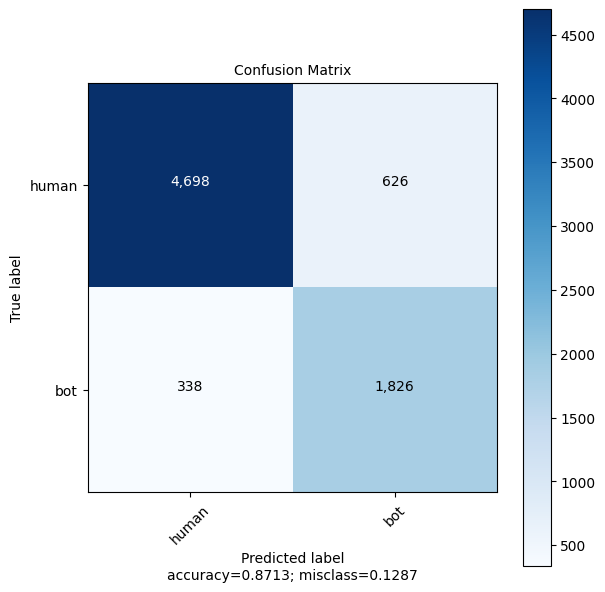

In [ ]:
lbgm.fit(X_train, y_train)
preds = lbgm.predict(X_val)
metrics_report(preds, y_val)

### CatBoost

Learning rate set to 0.04399
0:	learn: 0.6654391	total: 22.1ms	remaining: 22.1s
1:	learn: 0.6403333	total: 33.1ms	remaining: 16.5s
2:	learn: 0.6185985	total: 43.3ms	remaining: 14.4s
3:	learn: 0.6006127	total: 53.7ms	remaining: 13.4s
4:	learn: 0.5799125	total: 64.3ms	remaining: 12.8s
5:	learn: 0.5629274	total: 75ms	remaining: 12.4s
6:	learn: 0.5488615	total: 85.7ms	remaining: 12.2s
7:	learn: 0.5338206	total: 96ms	remaining: 11.9s
8:	learn: 0.5214159	total: 108ms	remaining: 11.9s
9:	learn: 0.5097431	total: 119ms	remaining: 11.8s
10:	learn: 0.4985998	total: 130ms	remaining: 11.7s
11:	learn: 0.4897682	total: 140ms	remaining: 11.5s
12:	learn: 0.4805020	total: 151ms	remaining: 11.4s
13:	learn: 0.4732503	total: 162ms	remaining: 11.4s
14:	learn: 0.4661919	total: 172ms	remaining: 11.3s
15:	learn: 0.4600601	total: 183ms	remaining: 11.3s
16:	learn: 0.4536397	total: 195ms	remaining: 11.3s
17:	learn: 0.4487137	total: 207ms	remaining: 11.3s
18:	learn: 0.4438634	total: 217ms	remaining: 11.2s
19:	lear

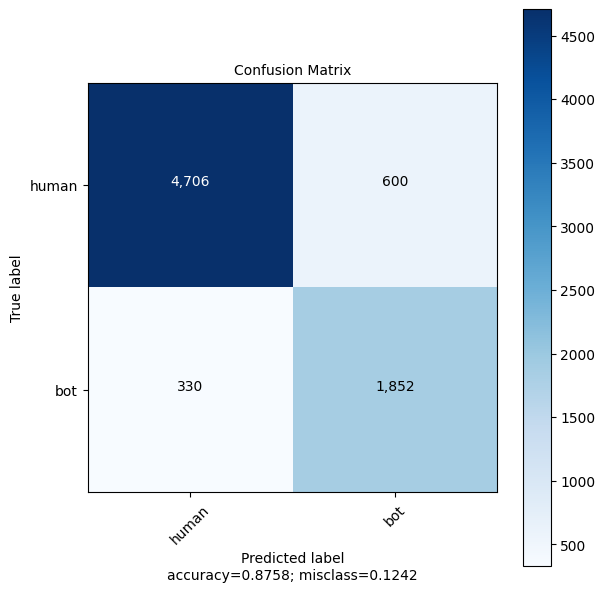

In [ ]:
cb.fit(X_train, y_train)
preds = cb.predict(X_val)
metrics_report(preds, y_val)

## Step 2.2: Feature Importance 

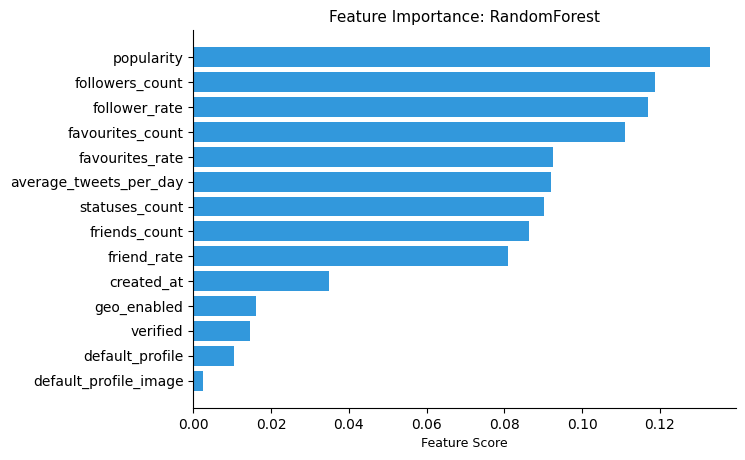

In [ ]:
plot_feature_importance(forest, features, model_alias='RandomForest')

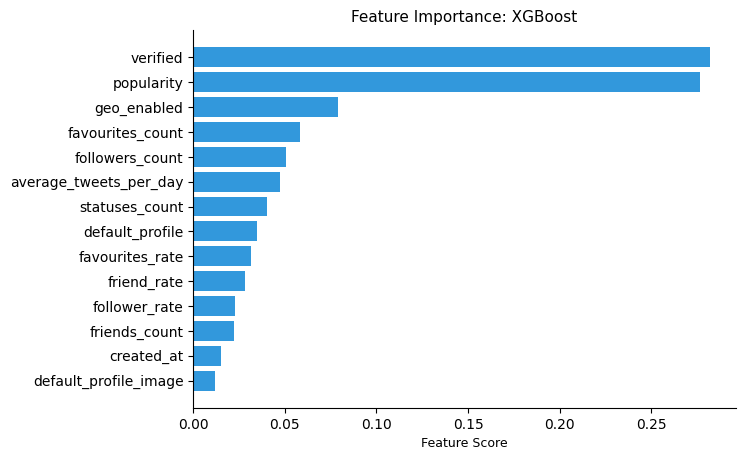

In [ ]:
plot_feature_importance(xgb, features, model_alias='XGBoost')

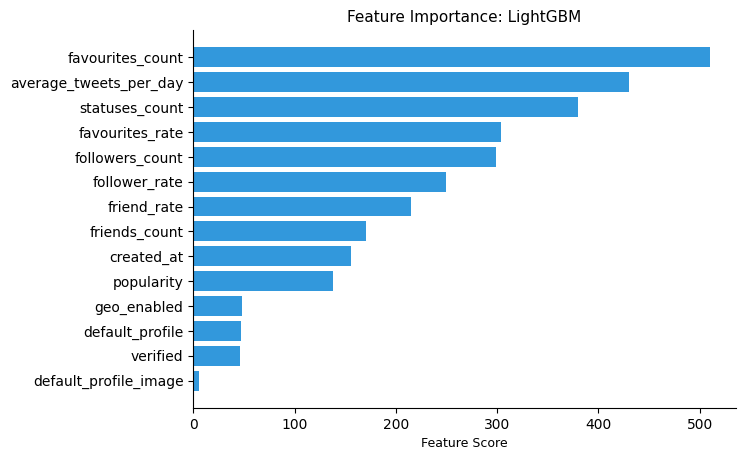

In [ ]:
plot_feature_importance(lbgm, features, model_alias='LightGBM')

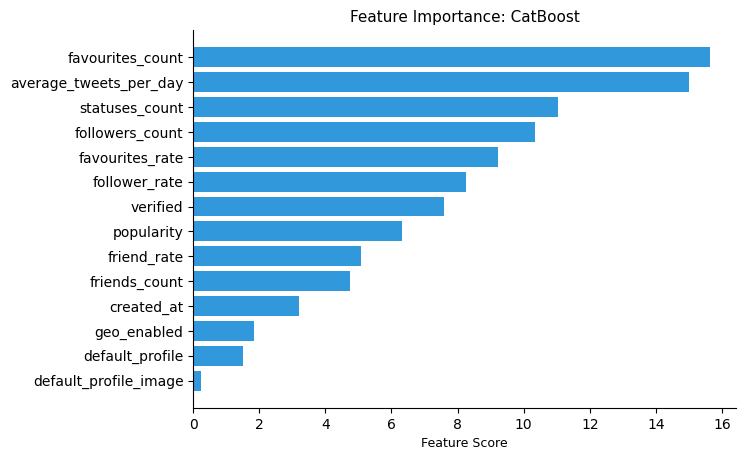

In [ ]:
plot_feature_importance(cb, features, model_alias='CatBoost')

## Step 3.1: Confusion Matrix on model with tunning 

### KNN


In [ ]:
def model_knn(X, y):
    knn = KNeighborsClassifier()
    param_grid = [{'weights':['uniform'], 'n_neighbors':[i for i in range(3,15)]},
                  {'weights':['distance'],'n_neighbors':[i for i in range(3,15)],'p':[i for i in range(1,3)]}]
    grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=2)
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

    return grid_search.best_estimator_

In [ ]:
# scale data
scale_train = StandardScaler()
scale_train.fit(X_train)
scaled_X = scale_train.transform(X_train)
scale_test = StandardScaler()
scale_test.fit(X_val)
scaled_test_x = scale_test.transform(X_val)

knn = model_knn(scaled_X, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... n_neighbors=3, weights=uniform, total=   1.0s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ................... n_neighbors=3, weights=uniform, total=   0.9s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.8s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   1.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.9s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=   1.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=   1.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=   0.9s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.3min finished


Classification Metrics Report
-----------------------------
Accuracy:  0.8196
Precision: 0.7397
Recall:    0.6929
F1 Score:  0.7155

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5036
           1       0.74      0.69      0.72      2452

    accuracy                           0.82      7488
   macro avg       0.80      0.79      0.79      7488
weighted avg       0.82      0.82      0.82      7488




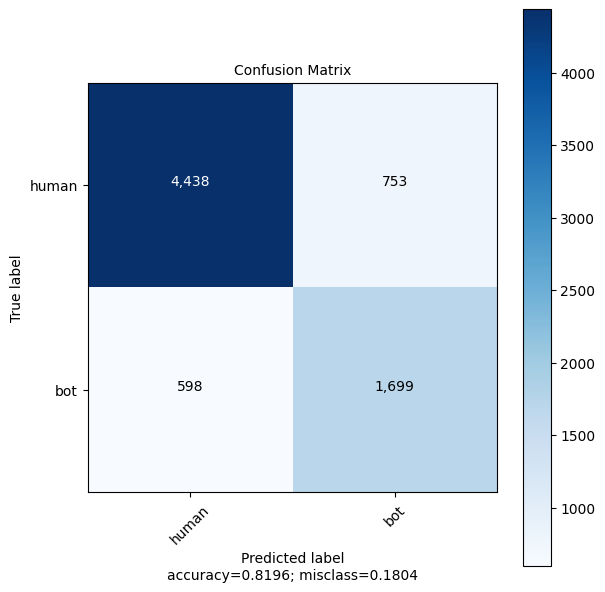

In [ ]:
res_y = knn.predict(scaled_test_x)
metrics_report(res_y, y_val)

### RandomForest

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


rf = RandomForestClassifier()



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X_train, y_train)
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.0min finished


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}  



In [ ]:
forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 70, bootstrap = False)

forest.fit(X_train, y_train)
preds = forest.predict(X_val)

metrics_report(preds, y_val)

### XGBoost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  3.1min finished


[09:24:24] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 All results:
{'mean_fit_time': array([45.52956867, 52.51358445, 53.65526907, 43.98895963, 37.64103635]), 'std_fit_time': array([0.31886674, 3.80630322, 2.18557223, 2.47234075, 2.67083221]), 'mean_score_time': array([0.33367173, 0.37414773, 0.37840748, 0.35481596, 0.13350662]), 'std_score_time': array([0.05961642, 0.03267619, 0.01547569, 0.00045425, 0.03892161]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False,

Classification Metrics Report
-----------------------------
Accuracy:  0.8714
Precision: 0.8395
Recall:    0.7508
F1 Score:  0.7927

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5036
           1       0.84      0.75      0.79      2452

    accuracy                           0.87      7488
   macro avg       0.86      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488




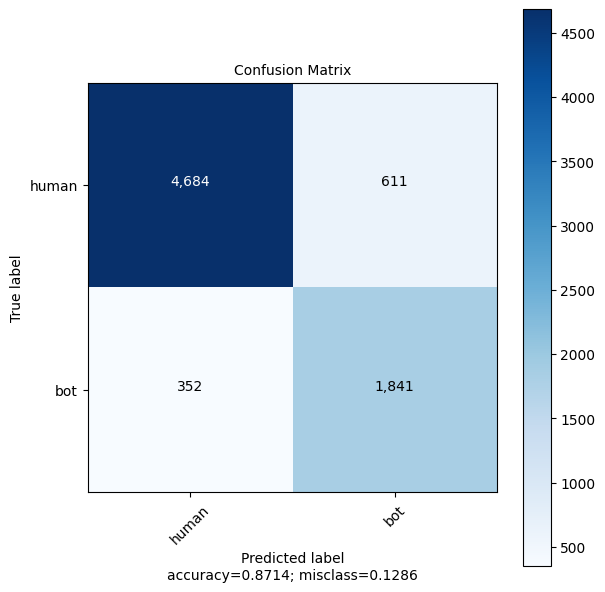

In [ ]:
xgb = XGBClassifier(subsample = 0.6, min_child_weight = 1, max_depth = 5, gamma = 1.5, colsample_bytree = 0.8)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_val)

metrics_report(preds, y_val)

### LightGBM

In [ ]:
# parameters too much, tune separately
lgbm = LGBMClassifier(learning_rate=0.1, num_iterations = 200)
    
# max_depth&num_leaves
param_grid = [{'max_depth': [6,8,10,12,14], 'num_leaves': [30,40,50,60]}]
grid_search = GridSearchCV(lgbm, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_depth=6, num_leaves=30 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... max_depth=6, num_leaves=30, total=   0.6s
[CV] max_depth=6, num_leaves=30 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....................... max_depth=6, num_leaves=30, total=   0.7s
[CV] max_depth=6, num_leaves=30 ......................................
[CV] ....................... max_depth=6, num_leaves=30, total=   0.6s
[CV] max_depth=6, num_leaves=30 ......................................
[CV] ....................... max_depth=6, num_leaves=30, total=   0.7s
[CV] max_depth=6, num_leaves=30 ......................................
[CV] ....................... max_depth=6, num_leaves=30, total=   0.7s
[CV] max_depth=6, num_leaves=40 ......................................
[CV] ....................... max_depth=6, num_leaves=40, total=   0.7s
[CV] max_depth=6, num_leaves=40 ......................................
[CV] ....................... max_depth=6, num_leaves=40, total=   0.7s
[CV] max_depth=6, num_leaves=40 ......................................
[CV] ....................... max_depth=6, num_leaves=40, total=   0.7s
[CV] max_depth=6, num_leaves=40 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


{'max_depth': 12, 'num_leaves': 50}
0.8785642737896493


In [ ]:
lgbm = grid_search.best_estimator_
# min_child_samples&min_child_weight
param_grid = [{'min_child_samples': [18,19,20,21,22], 'min_child_weight':[0.001,0.002]}]
grid_search = GridSearchCV(lgbm, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_child_samples=18, min_child_weight=0.001 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... min_child_samples=18, min_child_weight=0.001, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.001 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ..... min_child_samples=18, min_child_weight=0.001, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.001 ....................
[CV] ..... min_child_samples=18, min_child_weight=0.001, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.001 ....................
[CV] ..... min_child_samples=18, min_child_weight=0.001, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.001 ....................
[CV] ..... min_child_samples=18, min_child_weight=0.001, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.002 ....................
[CV] ..... min_child_samples=18, min_child_weight=0.002, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.002 ....................
[CV] ..... min_child_samples=18, min_child_weight=0.002, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.002 ....................
[CV] ..... min_child_samples=18, min_child_weight=0.002, total=   0.9s
[CV] min_child_samples=18, min_child_weight=0.002 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.1s finished


{'min_child_samples': 21, 'min_child_weight': 0.001}
0.8786644407345575


In [ ]:
lgbm = grid_search.best_estimator_
# lgbm = LGBMClassifier(learning_rate=0.1, num_iterations = 200, max_depth=12, num_leaves=50, min_child_samples=21, min_child_weight=0.01)
# feature_fraction bagging_fraction bagging_freq
param_grid = [{'feature_fraction':[0.6, 0.8, 1], 'bagging_fraction':[0.8,0.9,1], 'bagging_freq':[2,3,4]}]
grid_search = GridSearchCV(lgbm, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6, total=   1.1s
[CV] bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6 ......
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6, total=   1.2s
[CV] bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6 ......
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[CV]  bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6, total=   1.2s
[CV] bagging_fraction=0.8, bagging_freq=2, feature_fraction=0.6 ......
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.4min finished


{'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 1}
0.8794323873121869


In [ ]:
#lgbm = LGBMClassifier(learning_rate=0.1, num_iterations = 200, max_depth=12, num_leaves=50, min_child_samples=21, min_child_weight=0.01, 
                     #bagging_fraction=0.8, bagging_freq=4, feature_fraction=1)
lgbm = grid_search.best_estimator_
# reg_alpha reg_lambda
param_grid = [{'reg_alpha':[0.01,0.02], 'reg_lambda':[8,10,12,14], 'cat_smooth':[0,10,20]}]
grid_search = GridSearchCV(lgbm, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] cat_smooth=0, reg_alpha=0.01, reg_lambda=8 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... cat_smooth=0, reg_alpha=0.01, reg_lambda=8, total=   1.5s
[CV] cat_smooth=0, reg_alpha=0.01, reg_lambda=8 ......................
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ....... cat_smooth=0, reg_alpha=0.01, reg_lambda=8, total=   1.5s
[CV] cat_smooth=0, reg_alpha=0.01, reg_lambda=8 ......................
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[CV] ....... cat_smooth=0, reg_alpha=0.01, reg_lambda=8, total=   1.4s
[CV] cat_smooth=0, reg_alpha=0.01, reg_lambda=8 ......................
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[CV] ....... cat_smooth=0,

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.1min finished


{'cat_smooth': 0, 'reg_alpha': 0.02, 'reg_lambda': 10}
0.8798330550918196


In [ ]:
# try to tune parameters together, accuracy decreased
lgbm = LGBMClassifier(learning_rate=0.1, n_estimators = 200)

param_grid = [{'max_depth':[3,4,5], 'num_leaves':[2,5,10,15,20,25,30], 'subsample':[0.8, 0.9, 1.0], 
               'colsample_bytree':[0.8, 0.9, 1.0], 'reg_alpha':[0.01,0.02], 'reg_lambda':[8,10,12,14]}]
grid_search = GridSearchCV(lgbm, param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
[CV] colsample_bytree=0.8, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=8, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.8, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=8, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.8, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=8, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9 
[CV]  colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9, total=   0.3s
[CV] colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9 
[CV]  colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9, total=   0.4s
[CV] colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9 
[CV]  colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9, total=   0.4s
[CV] colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9 
[CV]  colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subsample=0.9, total=   0.3s
[CV] colsample_bytree=1.0, max_depth=3, num_leaves=2, reg_alpha=0.01, reg_lambda=10, subs

[Parallel(n_jobs=1)]: Done 7560 out of 7560 | elapsed: 68.5min finished


{'colsample_bytree': 1.0, 'max_depth': 5, 'num_leaves': 30, 'reg_alpha': 0.02, 'reg_lambda': 8, 'subsample': 0.8}
0.8768280467445744


In [ ]:
#lgbm = LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, cat_smooth=0,feature_fraction=1, max_depth=12, min_child_samples=21,
               #min_child_weight=0.01, num_iterations=200, num_leaves=50,reg_alpha=0.02, reg_lambda=10)

# best model
lgbm = grid_search.best_estimator_
print(lgbm)

LGBMClassifier(max_depth=5, n_estimators=200, num_leaves=30, reg_alpha=0.02,
               reg_lambda=8, subsample=0.8)


Classification Metrics Report
-----------------------------
Accuracy:  0.8774
Precision: 0.8528
Recall:    0.7561
F1 Score:  0.8016

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5036
           1       0.85      0.76      0.80      2452

    accuracy                           0.88      7488
   macro avg       0.87      0.85      0.86      7488
weighted avg       0.88      0.88      0.88      7488




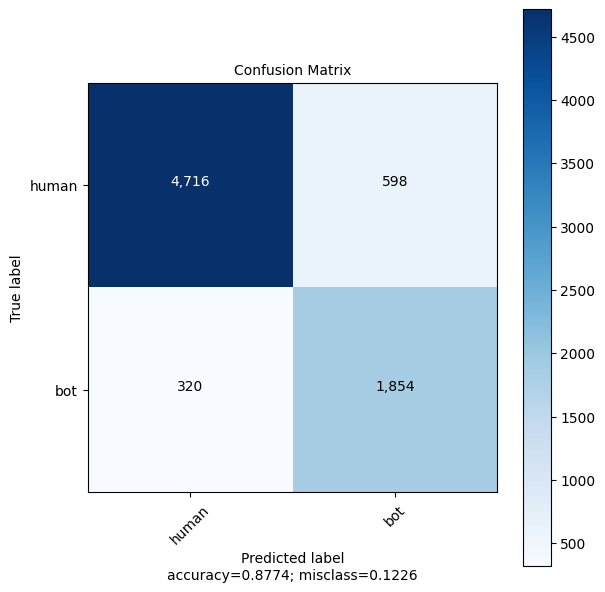

In [ ]:
# test result
lgbm_best = LGBMClassifier(bagging_fraction=0.8, bagging_freq=4, cat_smooth=0,feature_fraction=1, max_depth=12, min_child_samples=21, min_child_weight=0.01, num_iterations=200, num_leaves=50,reg_alpha=0.02, reg_lambda=10)
lgbm_best.fit(X_train, y_train)
res = lgbm_best.predict(X_val)
metrics_report(res, y_val)

### CatBoost

In [ ]:
# too time-consuming, cannot trune all parameters together
cb = CatBoostClassifier()
param_grid = [{'depth': [4, 6, 8, 10], 'random_strength': [1, 5, 10]}]
grid = GridSearchCV(cb, param_grid, cv=5, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] depth=4, random_strength=1 ......................................
Learning rate set to 0.039992
0:	learn: 0.6694040	total: 18.9ms	remaining: 18.9s
1:	learn: 0.6492572	total: 27.8ms	remaining: 13.9s
2:	learn: 0.6292946	total: 34.5ms	remaining: 11.5s
3:	learn: 0.6102763	total: 41ms	remaining: 10.2s
4:	learn: 0.5950068	total: 46.9ms	remaining: 9.34s
5:	learn: 0.5786478	total: 53.4ms	remaining: 8.84s
6:	learn: 0.5662169	total: 60ms	remaining: 8.51s
7:	learn: 0.5540174	total: 66.8ms	remaining: 8.28s
8:	learn: 0.5435930	total: 72.7ms	remaining: 8.01s
9:	learn: 0.5342634	total: 79.3ms	remaining: 7.85s
10:	learn: 0.5231866	total: 86.5ms	remaining: 7.78s
11:	learn: 0.5154158	total: 93.3ms	remaining: 7.68s
12:	learn: 0.5070445	total: 100ms	remaining: 7.61s
13:	learn: 0.5002002	total: 106ms	remaining: 7.49s
14:	learn: 0.4935009	total: 113ms	remaining: 7.4s
15:	learn: 0.4875872	total: 119ms	remaining: 7.33s
16:	learn: 0.4817387	tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


17:	learn: 0.4758396	total: 141ms	remaining: 7.69s
18:	learn: 0.4708338	total: 148ms	remaining: 7.63s
19:	learn: 0.4661242	total: 155ms	remaining: 7.57s
20:	learn: 0.4616449	total: 161ms	remaining: 7.51s
21:	learn: 0.4577659	total: 168ms	remaining: 7.47s
22:	learn: 0.4535862	total: 175ms	remaining: 7.41s
23:	learn: 0.4500482	total: 181ms	remaining: 7.35s
24:	learn: 0.4467500	total: 187ms	remaining: 7.31s
25:	learn: 0.4438423	total: 197ms	remaining: 7.37s
26:	learn: 0.4410463	total: 206ms	remaining: 7.44s
27:	learn: 0.4384498	total: 213ms	remaining: 7.39s
28:	learn: 0.4359017	total: 219ms	remaining: 7.34s
29:	learn: 0.4334426	total: 226ms	remaining: 7.32s
30:	learn: 0.4311891	total: 233ms	remaining: 7.29s
31:	learn: 0.4290527	total: 240ms	remaining: 7.27s
32:	learn: 0.4266309	total: 247ms	remaining: 7.24s
33:	learn: 0.4246199	total: 254ms	remaining: 7.22s
34:	learn: 0.4220072	total: 260ms	remaining: 7.18s
35:	learn: 0.4199606	total: 267ms	remaining: 7.15s
36:	learn: 0.4176069	total: 274

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
22:	learn: 0.4323749	total: 2.1s	remaining: 1m 29s
23:	learn: 0.4290314	total: 2.2s	remaining: 1m 29s
24:	learn: 0.4244855	total: 2.29s	remaining: 1m 29s
25:	learn: 0.4207807	total: 2.4s	remaining: 1m 29s
26:	learn: 0.4173680	total: 2.49s	remaining: 1m 29s
27:	learn: 0.4139068	total: 2.58s	remaining: 1m 29s
28:	learn: 0.4112564	total: 2.69s	remaining: 1m 29s
29:	learn: 0.4087669	total: 2.78s	remaining: 1m 29s
30:	learn: 0.4063377	total: 2.88s	remaining: 1m 29s
31:	learn: 0.4054475	total: 2.9s	remaining: 1m 27s
32:	learn: 0.4027293	total: 3s	remaining: 1m 27s
33:	learn: 0.3990940	total: 3.09s	remaining: 1m 27s
34:	learn: 0.3968816	total: 3.19s	remaining: 1m 28s
35:	learn: 0.3946584	total: 3.28s	remaining: 1m 27s
36:	learn: 0.3921548	total: 3.38s	remaining: 1m 27s
37:	learn: 0.3900866	total: 3.44s	remaining: 1m 27s
38:	learn: 0.3891785	total: 3.47s	remaining: 1m 25s
39:	learn: 0.3877056	total: 3.57s	remaining: 1m 25s
40:	learn: 0.3860258

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 21.4min finished


8:	learn: 0.5268429	total: 186ms	remaining: 20.5s
9:	learn: 0.5161788	total: 208ms	remaining: 20.6s
10:	learn: 0.5059225	total: 227ms	remaining: 20.4s
11:	learn: 0.4971427	total: 244ms	remaining: 20.1s
12:	learn: 0.4911684	total: 260ms	remaining: 19.8s
13:	learn: 0.4836344	total: 279ms	remaining: 19.6s
14:	learn: 0.4765509	total: 298ms	remaining: 19.6s
15:	learn: 0.4696843	total: 316ms	remaining: 19.4s
16:	learn: 0.4618956	total: 334ms	remaining: 19.3s
17:	learn: 0.4562797	total: 353ms	remaining: 19.3s
18:	learn: 0.4517756	total: 372ms	remaining: 19.2s
19:	learn: 0.4467515	total: 397ms	remaining: 19.5s
20:	learn: 0.4426773	total: 420ms	remaining: 19.6s
21:	learn: 0.4378611	total: 437ms	remaining: 19.4s
22:	learn: 0.4336505	total: 455ms	remaining: 19.3s
23:	learn: 0.4298387	total: 473ms	remaining: 19.2s
24:	learn: 0.4263073	total: 491ms	remaining: 19.2s
25:	learn: 0.4232401	total: 509ms	remaining: 19.1s
26:	learn: 0.4206746	total: 527ms	remaining: 19s
27:	learn: 0.4182171	total: 545ms	r

In [ ]:
cb = grid.best_estimator_
param_grid = [{'learning_rate' : [0.05, 0.1, 0.15], 'l2_leaf_reg': [1,4,9], 'iterations':[100, 500, 1000]}]
grid = GridSearchCV(cb, param_grid, cv=5, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] iterations=100, l2_leaf_reg=1, learning_rate=0.05 ...............
0:	learn: 0.6708960	total: 12.2ms	remaining: 1.21s
1:	learn: 0.6513216	total: 24.5ms	remaining: 1.2s
2:	learn: 0.6341336	total: 36.4ms	remaining: 1.18s
3:	learn: 0.6185394	total: 48.3ms	remaining: 1.16s
4:	learn: 0.6038887	total: 60.1ms	remaining: 1.14s
5:	learn: 0.5902407	total: 77.2ms	remaining: 1.21s
6:	learn: 0.5784807	total: 93.3ms	remaining: 1.24s
7:	learn: 0.5667840	total: 116ms	remaining: 1.33s
8:	learn: 0.5563578	total: 129ms	remaining: 1.3s
9:	learn: 0.5466141	total: 142ms	remaining: 1.28s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10:	learn: 0.5368023	total: 160ms	remaining: 1.29s
11:	learn: 0.5290002	total: 164ms	remaining: 1.2s
12:	learn: 0.5206483	total: 176ms	remaining: 1.18s
13:	learn: 0.5133273	total: 188ms	remaining: 1.16s
14:	learn: 0.5064401	total: 200ms	remaining: 1.13s
15:	learn: 0.4991895	total: 212ms	remaining: 1.11s
16:	learn: 0.4918237	total: 225ms	remaining: 1.1s
17:	learn: 0.4862413	total: 237ms	remaining: 1.08s
18:	learn: 0.4805541	total: 250ms	remaining: 1.06s
19:	learn: 0.4752106	total: 262ms	remaining: 1.05s
20:	learn: 0.4704419	total: 274ms	remaining: 1.03s
21:	learn: 0.4662828	total: 287ms	remaining: 1.02s
22:	learn: 0.4616198	total: 296ms	remaining: 990ms
23:	learn: 0.4577998	total: 308ms	remaining: 976ms
24:	learn: 0.4542568	total: 327ms	remaining: 980ms
25:	learn: 0.4502829	total: 338ms	remaining: 963ms
26:	learn: 0.4467948	total: 351ms	remaining: 948ms
27:	learn: 0.4433537	total: 367ms	remaining: 943ms
28:	learn: 0.4401081	total: 379ms	remaining: 928ms
29:	learn: 0.4379453	total: 397ms

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
13:	learn: 0.3835672	total: 238ms	remaining: 16.8s
14:	learn: 0.3804547	total: 255ms	remaining: 16.7s
15:	learn: 0.3781977	total: 276ms	remaining: 16.9s
16:	learn: 0.3751056	total: 292ms	remaining: 16.9s
17:	learn: 0.3693703	total: 309ms	remaining: 16.9s
18:	learn: 0.3662567	total: 333ms	remaining: 17.2s
19:	learn: 0.3632188	total: 350ms	remaining: 17.1s
20:	learn: 0.3614690	total: 367ms	remaining: 17.1s
21:	learn: 0.3590751	total: 384ms	remaining: 17.1s
22:	learn: 0.3573344	total: 403ms	remaining: 17.1s
23:	learn: 0.3560249	total: 430ms	remaining: 17.5s
24:	learn: 0.3535190	total: 447ms	remaining: 17.4s
25:	learn: 0.3518018	total: 463ms	remaining: 17.3s
26:	learn: 0.3497589	total: 479ms	remaining: 17.3s
27:	learn: 0.3485991	total: 496ms	remaining: 17.2s
28:	learn: 0.3476418	total: 513ms	remaining: 17.2s
29:	learn: 0.3466921	total: 531ms	remaining: 17.2s
30:	learn: 0.3435359	total: 557ms	remaining: 17.4s
31:	learn: 0.3416475	total: 574

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 22.6min finished


4:	learn: 0.5687534	total: 96ms	remaining: 19.1s
5:	learn: 0.5532338	total: 115ms	remaining: 19.1s
6:	learn: 0.5384127	total: 132ms	remaining: 18.7s
7:	learn: 0.5249592	total: 152ms	remaining: 18.9s
8:	learn: 0.5142117	total: 180ms	remaining: 19.9s
9:	learn: 0.5036318	total: 200ms	remaining: 19.8s
10:	learn: 0.4928968	total: 218ms	remaining: 19.6s
11:	learn: 0.4842719	total: 236ms	remaining: 19.4s
12:	learn: 0.4785914	total: 253ms	remaining: 19.2s
13:	learn: 0.4712539	total: 271ms	remaining: 19.1s
14:	learn: 0.4644252	total: 289ms	remaining: 19s
15:	learn: 0.4578050	total: 313ms	remaining: 19.3s
16:	learn: 0.4504376	total: 332ms	remaining: 19.2s
17:	learn: 0.4452237	total: 349ms	remaining: 19.1s
18:	learn: 0.4410147	total: 367ms	remaining: 18.9s
19:	learn: 0.4363235	total: 388ms	remaining: 19s
20:	learn: 0.4324995	total: 407ms	remaining: 19s
21:	learn: 0.4280485	total: 425ms	remaining: 18.9s
22:	learn: 0.4240896	total: 443ms	remaining: 18.8s
23:	learn: 0.4205023	total: 461ms	remaining:

In [ ]:
cb = grid.best_estimator_
print(grid.best_params_)

{'iterations': 1000, 'l2_leaf_reg': 9, 'learning_rate': 0.05}


Classification Metrics Report
-----------------------------
Accuracy:  0.8766
Precision: 0.8508
Recall:    0.7557
F1 Score:  0.8004

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5036
           1       0.85      0.76      0.80      2452

    accuracy                           0.88      7488
   macro avg       0.87      0.85      0.86      7488
weighted avg       0.88      0.88      0.87      7488




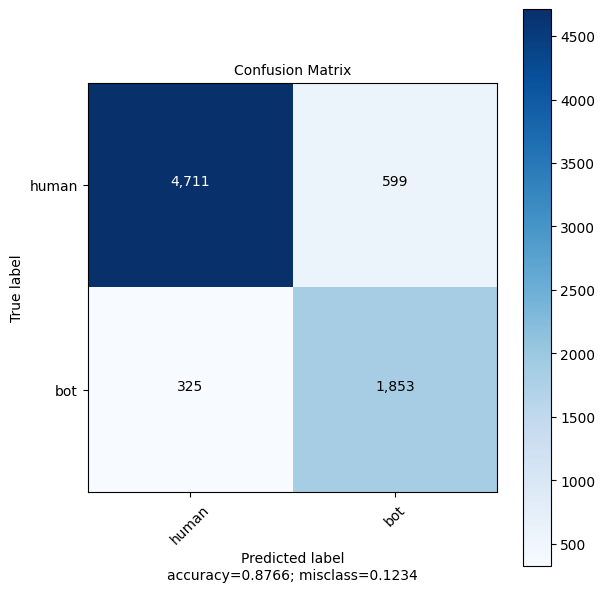

In [ ]:
# cb = CatBoostClassifier(depth=8, random_strength=5, learning_rate=0.05, l2_leaf_reg=1, iterations=1000)
# cb.fit(X_train, y_train)
res = cb.predict(X_val)
metrics_report(res, y_val)

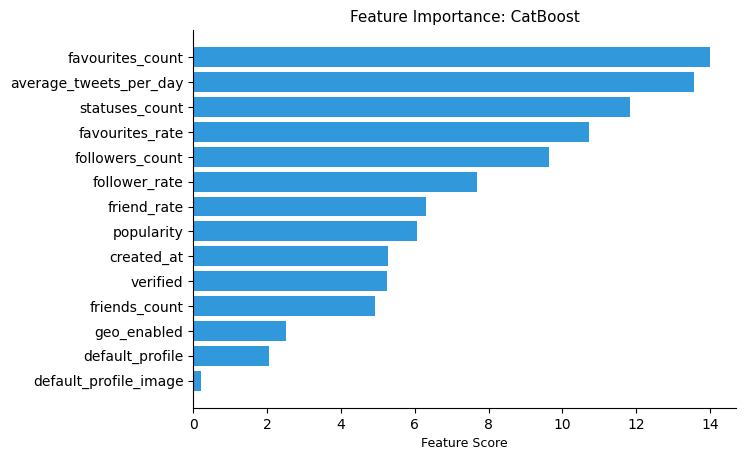

In [ ]:
plot_feature_importance(cb, features, model_alias='CatBoost')

## Step 3.2 : Feature Importance

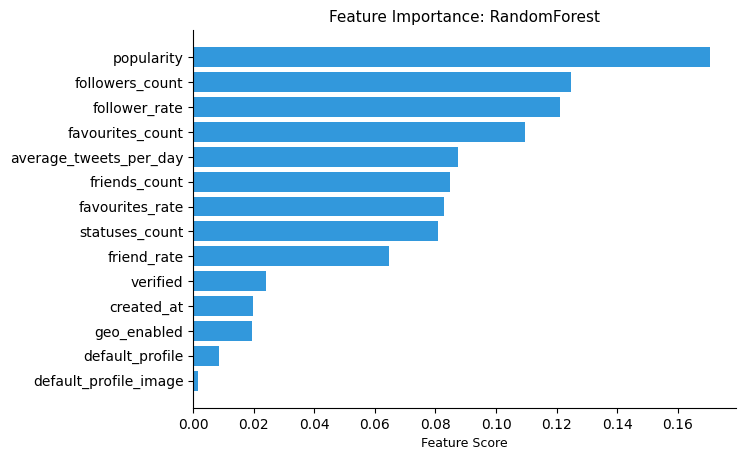

In [ ]:
plot_feature_importance(forest, features, model_alias='RandomForest')

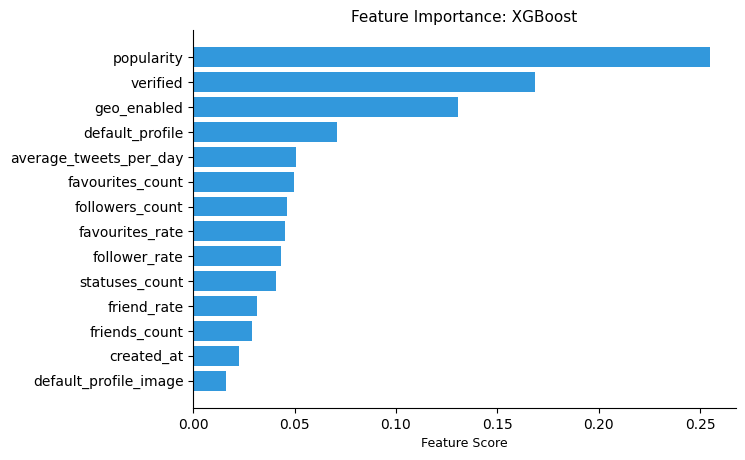

In [ ]:
plot_feature_importance(xgb, features, model_alias='XGBoost')

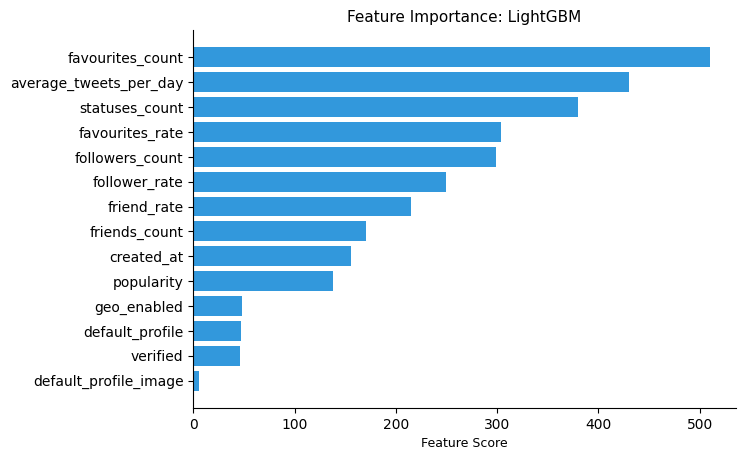

In [ ]:
plot_feature_importance(lbgm, features, model_alias='LightGBM')

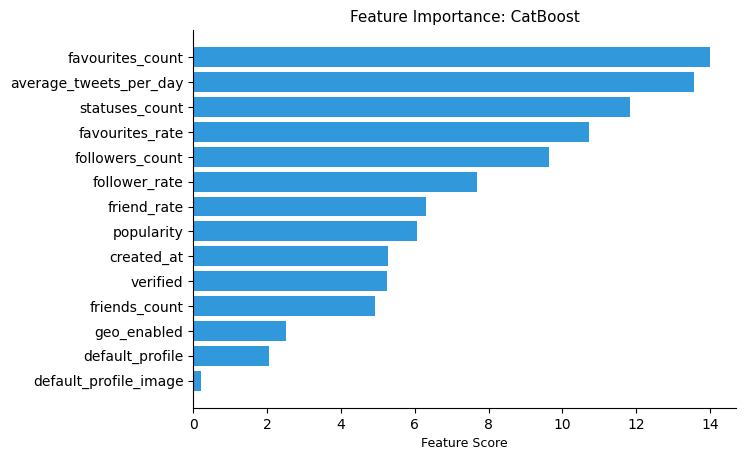

In [ ]:
plot_feature_importance(cb, features, model_alias='CatBoost')